In [1]:
import pandas as pd
import json
import requests

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
METRICS_MIRCEA = 'code_smells,bugs,classes,lines,ncloc,sqale_index,violations,blocker_violations,critical_violations,major_violations,minor_violations'
METRICS = METRICS_MIRCEA
SONARQUBE_IP = 'http://195.251.210.166'
SONARQUBE_PORT = '9000'
GITHUB_OWNER = 'apache'
GITHUB_REPO = 'maven'
SONARQUBE_PROJECT_KEY = GITHUB_OWNER + ':' + GITHUB_REPO
SONARQUBE_API_URL = SONARQUBE_IP + ':' + SONARQUBE_PORT + '/api/'
SONARQUBE_RESOURCE = 'resource=' + SONARQUBE_PROJECT_KEY
METRICS_LIST = METRICS.split(',')
PROJECT_KEYS = ['eclipse:egit-github','apache:maven','apache:hadoop']
metrics_list_length = len(METRICS_LIST)

In [4]:
# response = requests.get(SONARQUBE_API_URL + 'timemachine?' + SONARQUBE_RESOURCE + '&metrics=' + METRICS)
# json_data = json.loads(response.text)
# cells = json_data[0]['cells']  # cells - metric values
# cols = json_data[0]['cols']  # cols - Metrcs
# no_of_commits = len(cells)

In [5]:
def get_project_dates(cells):
    dates = []
    for item in cells:
        dates.append(pd.Timestamp(item.get('d')))
    return dates

def get_max_project_date(cells):
    max_date = pd.Timestamp(cells[0].get('d'))
    for item in cells:
        current_date = pd.Timestamp(item.get('d'))
        if (current_date > max_date):
            max_date = current_date
    return max_date

def get_project_metrics(cells):
    df = pd.DataFrame(index=get_date_range_index(), columns=METRICS_LIST)
    for item in cells:
        for metric_index in range(0, metrics_list_length):
            df[METRICS_LIST[metric_index]][pd.Timestamp(item.get('d')).date()] = item.get('v')[metric_index]
    return df

def get_date_range_index(cells):
    project_dates = get_project_dates(cells)
    min_project_date = min(project_dates)
    max_project_date = max(project_dates)
    return pd.date_range(start=min_project_date.date(), end=max_project_date.date(), freq='D')

def get_project_metricsBySeries(cells):
    date_range_index = get_date_range_index(cells)
    df = pd.DataFrame(index=date_range_index)
    for metric_index in range(0, metrics_list_length):
        s = pd.Series(index=date_range_index)
        for item in cells:
            s[pd.Timestamp(item.get('d')).date()] = item.get('v')[metric_index]
        df[METRICS_LIST[metric_index]] = s
    return df

def plot_all(project_metrics):
    for metric_index in range(0, metrics_list_length):
        project_metrics[METRICS_LIST[metric_index]].plot()

def get_json_data(sq_resource):
    response = requests.get(SONARQUBE_API_URL + 'timemachine?' + 'resource=' + sq_resource + '&metrics=' + METRICS)
    json_data = json.loads(response.text)
    return json_data

def get_cells(json_data):
    return json_data[0]['cells']  # cells - metric values

def get_colls(json_data):
    return json_data[0]['cols']  # cols - Metrcs

def get_no_of_commits(cells):
    return len(cells)

def do_plots(pk):
    json_data = get_json_data(pk)
    cells = get_cells(json_data)
    project_metrics = get_project_metricsBySeries(cells)
    project_metrics_NA_filled = project_metrics.fillna(method='ffill')
    print('Without fillna ffill method')
    project_metrics.plot(figsize=(15, 10))
    print('With fillna ffill method')
    project_metrics_NA_filled.plot(figsize=(15, 10))
    print('1 week rolling')
    project_metrics_NA_filled.rolling(window=7,center=False).mean().plot(figsize=(15, 10))
    print('30 days rolling')
    project_metrics_NA_filled.rolling(window=30,center=False).mean().plot(figsize=(15, 10))
    project_metrics_NA_filled.corr()

# Apache Maven

Without fillna ffill method
With fillna ffill method
1 week rolling
30 days rolling


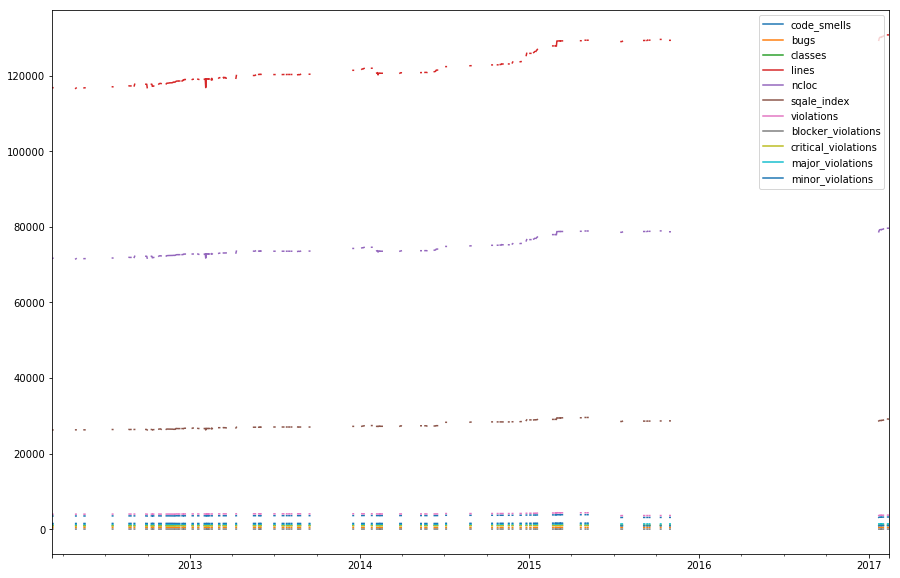

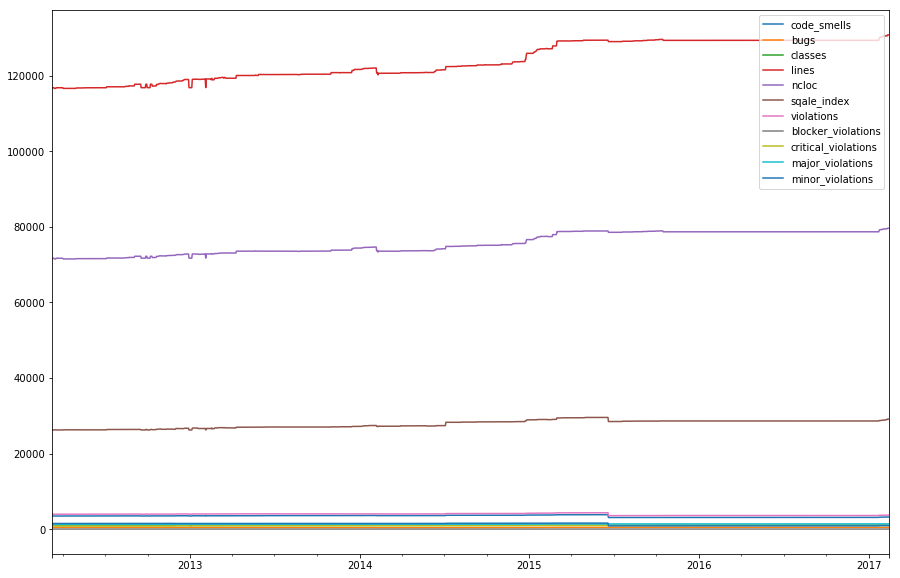

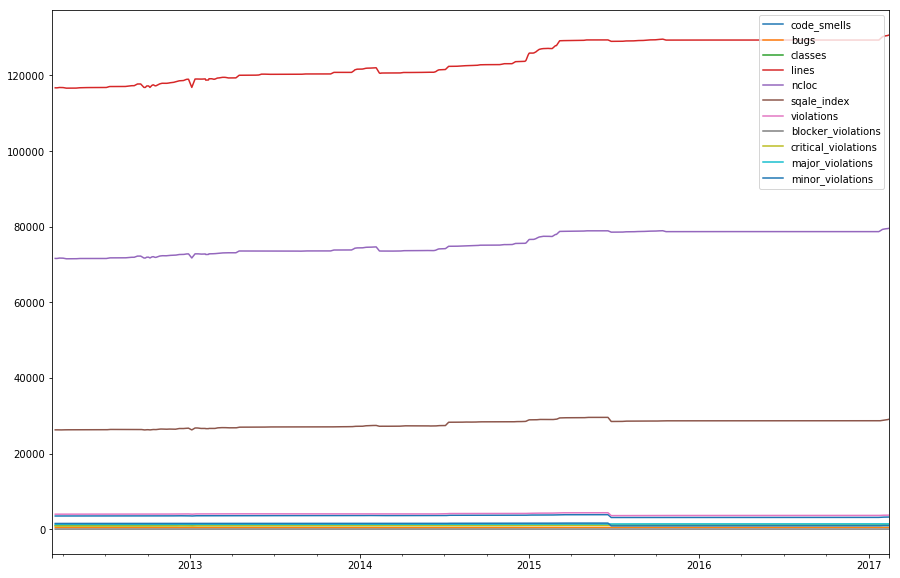

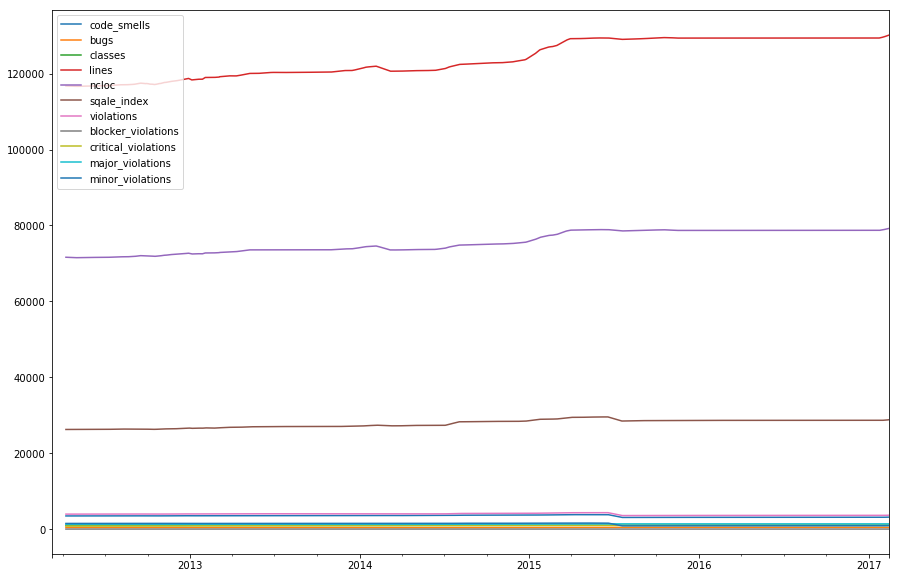

In [6]:
do_plots('apache:maven')

# Apache hadoop

Without fillna ffill method
With fillna ffill method
1 week rolling
30 days rolling


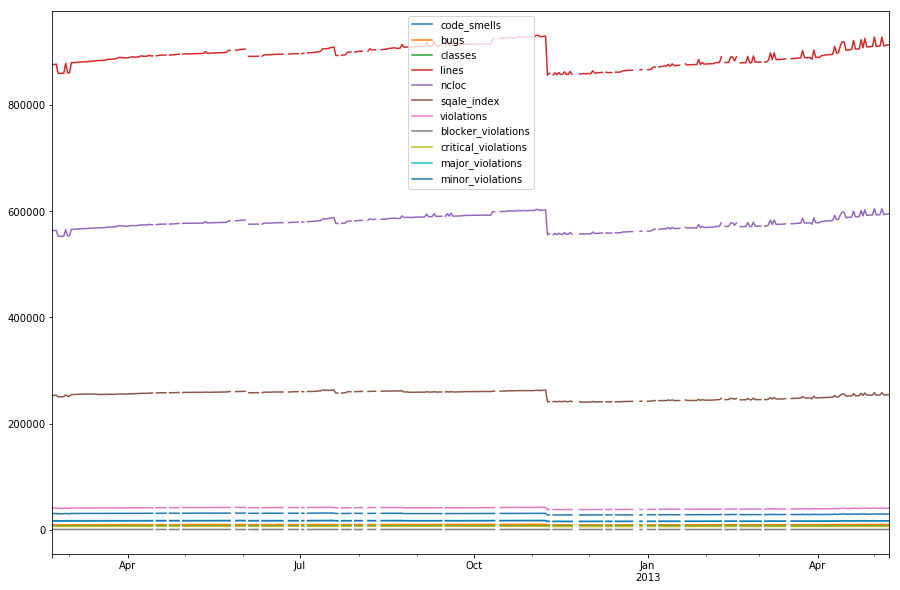

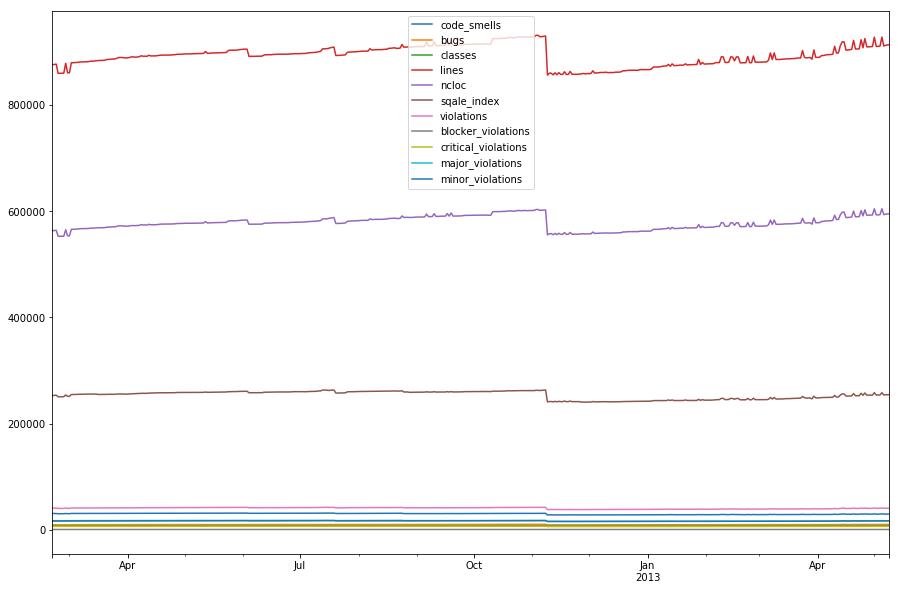

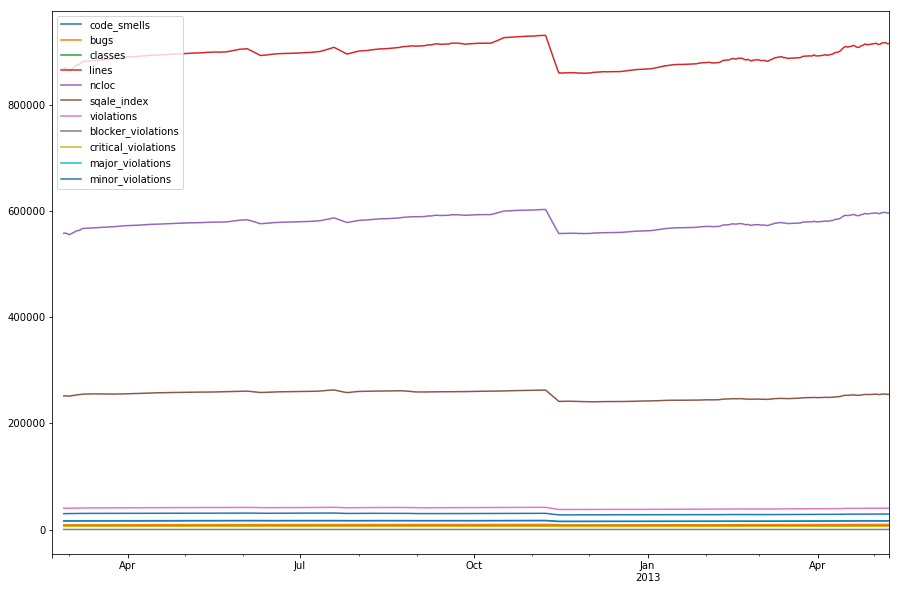

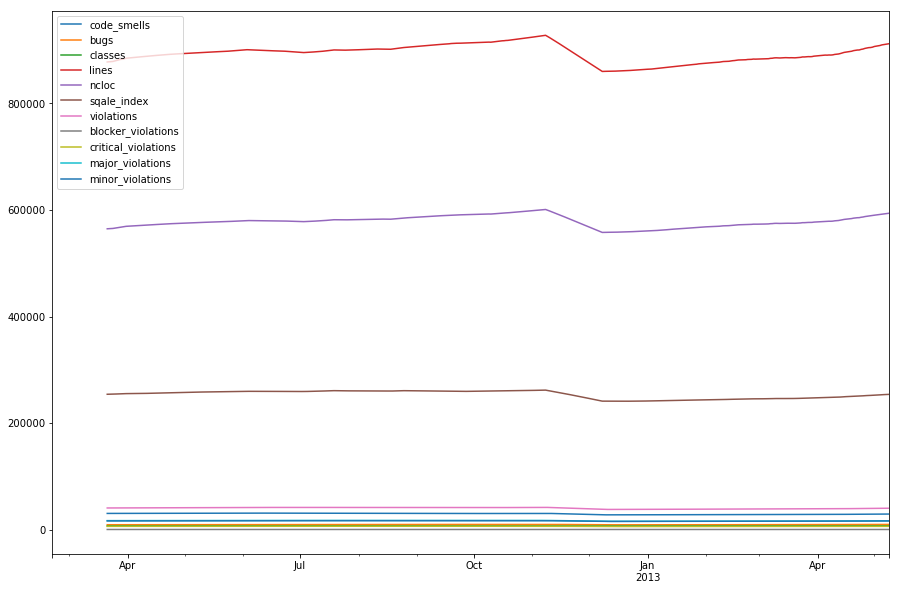

In [7]:
do_plots('apache:hadoop')

# eclipse egit-github

Without fillna ffill method
With fillna ffill method
1 week rolling
30 days rolling


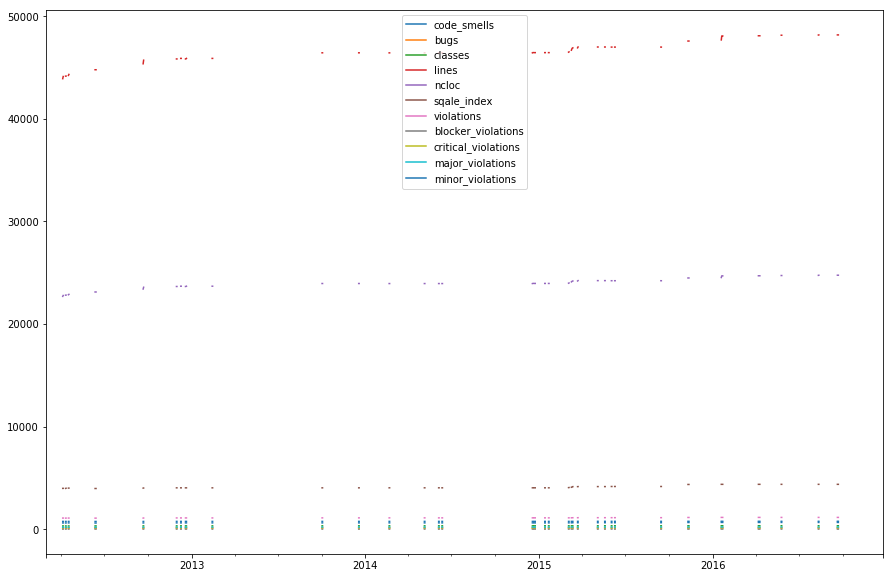

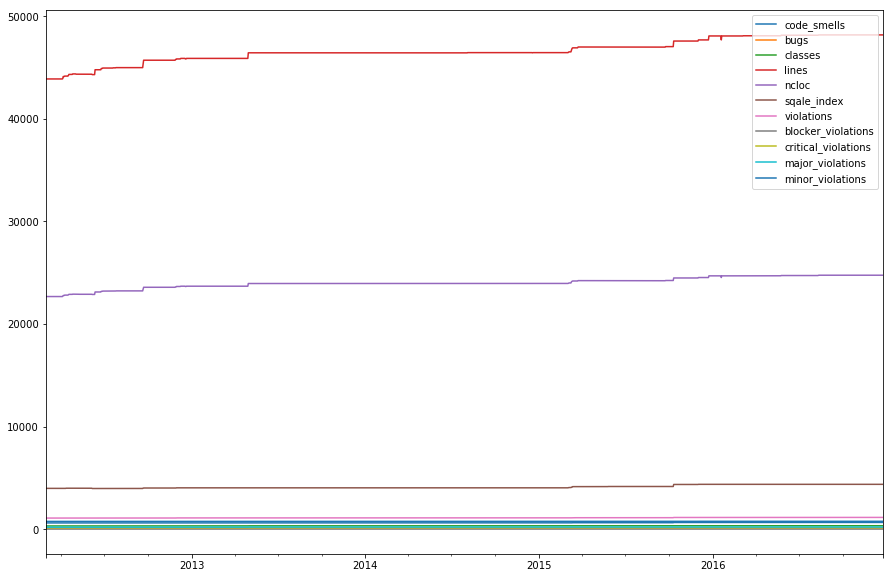

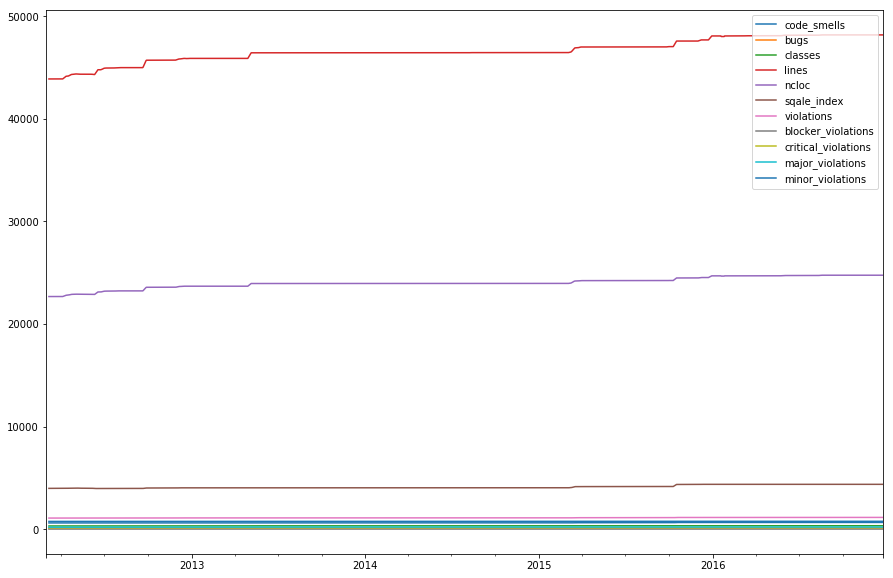

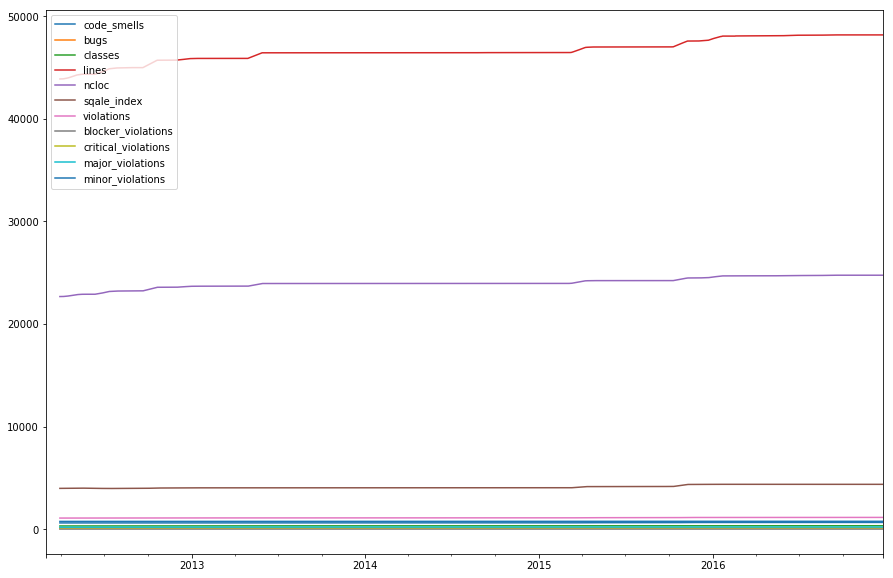

In [8]:
do_plots('eclipse:egit-github')

# eclipse jgit

Without fillna ffill method
With fillna ffill method
1 week rolling
30 days rolling


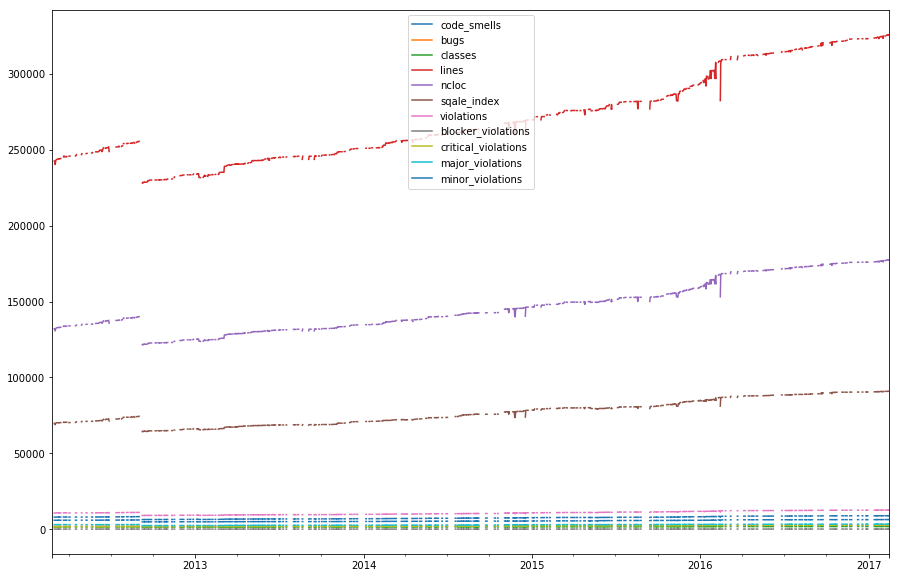

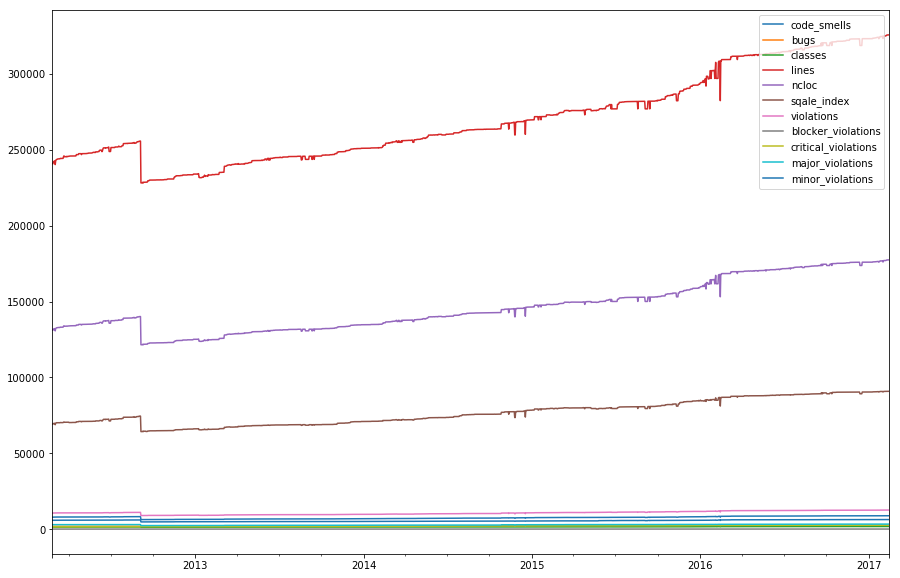

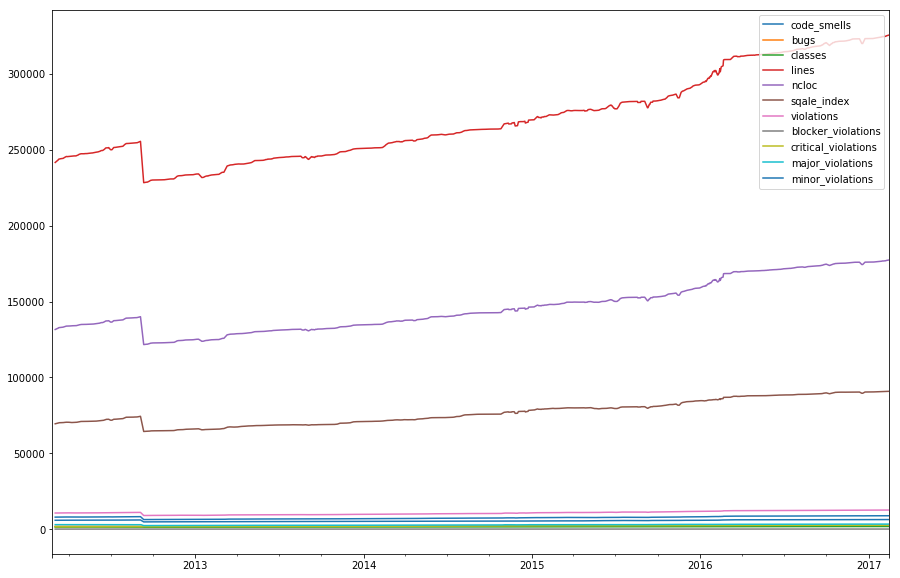

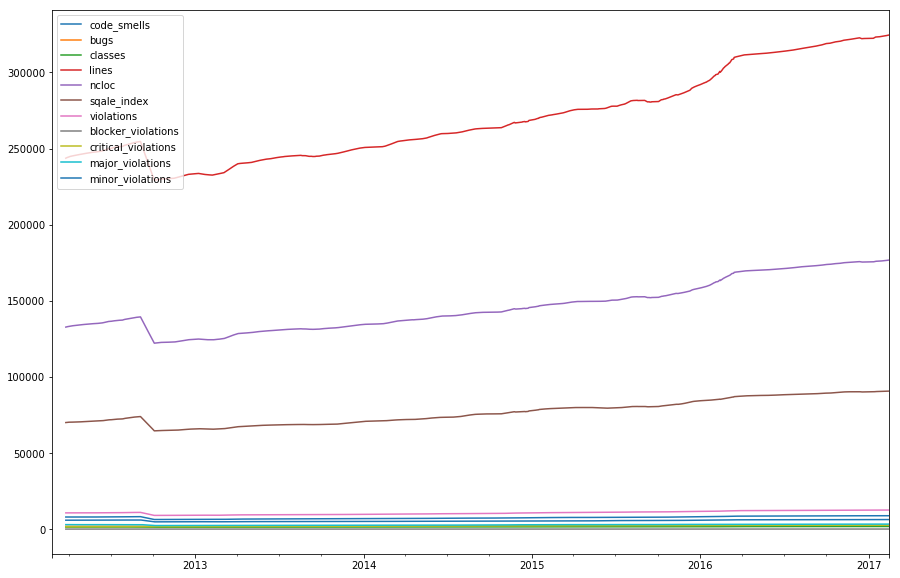

In [9]:
do_plots('eclipse:jgit')

# spring-projects spring-framework

Without fillna ffill method
With fillna ffill method
1 week rolling
30 days rolling


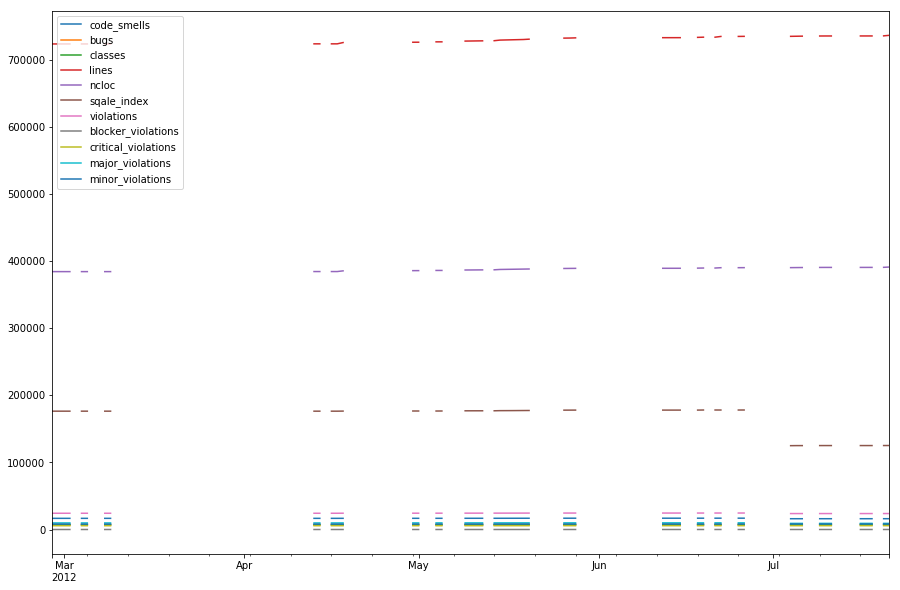

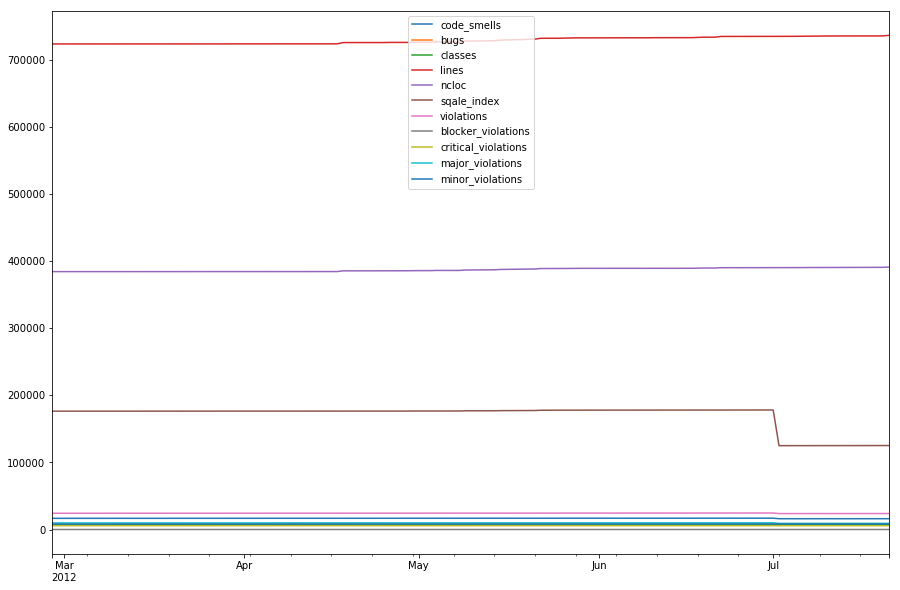

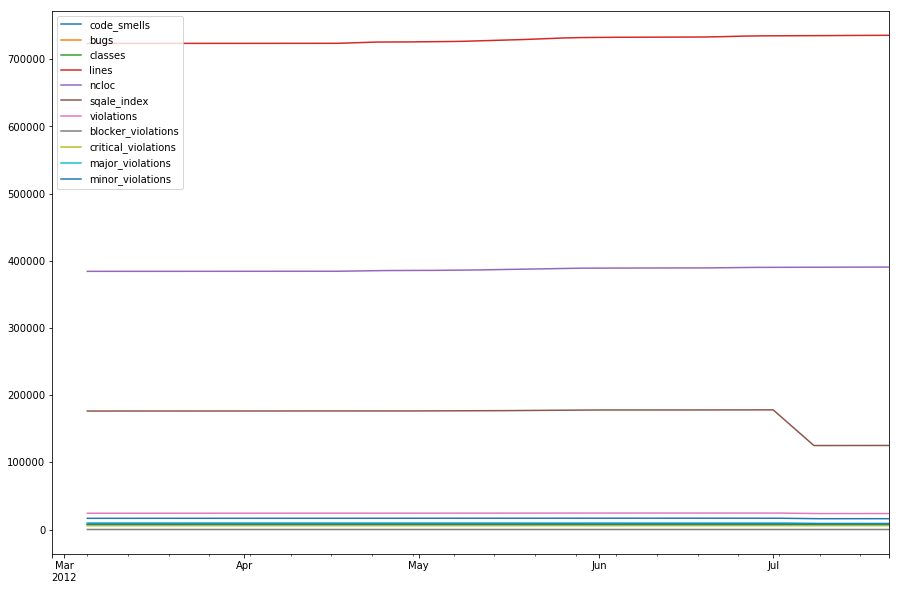

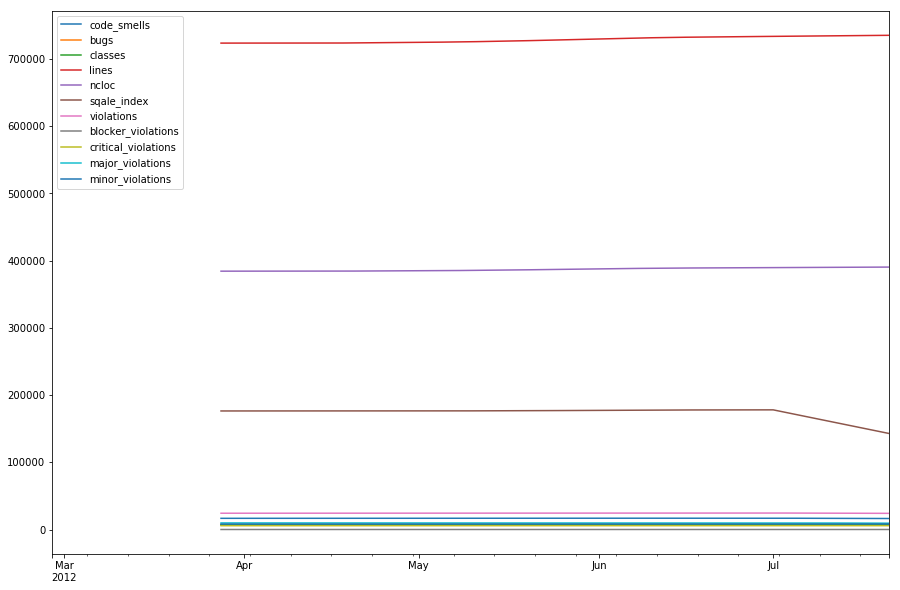

In [10]:
do_plots('spring-projects:spring-framework')